# Ejemplo 1: Últimos Tweets 

In [2]:
%run "oauth.py"

In [1]:
# Aquí introducimos nuestras claves de Twitter
def oauth() :
    return { "consumer_key" : "XXXX",
        "consumer_secret" : "XXXX",
        "token_key" : "XXXX",
        "token_secret" : "XXXX" }

In [3]:
# Esta función va a generar los parámetros necesarios para generar la URL
def augment(url, parameters) :
    secrets = oauth()
    consumer = OAuthConsumer(secrets['consumer_key'], secrets['consumer_secret'])
    token = OAuthToken(secrets['token_key'],secrets['token_secret'])

    oauth_request = OAuthRequest.from_consumer_and_token(consumer, 
        token=token, http_method='GET', http_url=url, parameters=parameters)
    oauth_request.sign_request(OAuthSignatureMethod_HMAC_SHA1(), consumer, token)
    return oauth_request.to_url()

In [4]:
import urllib.request
import json

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'

acct = 'openwebinars'
n_tweets = 5

url = augment(TWITTER_URL,
             {'screen_name':acct, 'count': n_tweets,'include_rts':'True',
             'tweet_mode':'extended'})

connection = urllib.request.urlopen(url)

data = connection.read().decode()
js = json.loads(data)

for k in range(0,n_tweets):
    tweet = js[k]['full_text']
    print('\nTweet ' + str(k+1) + ': '+ tweet)


Tweet 1: Gran curso y gran profesor! #OWesome https://t.co/E1lBUt1D1u

Tweet 2: @jjv Gracias!!! @jjv https://t.co/YN7ioytvRA

Tweet 3: 🚀3⃣ Curso de #Unity: Crear tus propios videojuegos con este curso de Unity desde cero, que te permitirá iniciarte en el desarrollo de videojuegos de forma teórica y práctica. https://t.co/tF5WuCOPEn

Tweet 4: 🚀2⃣ Curso de #LoadRunner: Aprende a utilizar esta potente herramienta para desarrolladores, con la podrás realizar pruebas de rendimiento de software. https://t.co/gyuSPtcIo8

Tweet 5: 🚀1⃣ Curso de #Bash Scripting y automatización de procesos: Crea scripts con los que podrás automatizar tareas utilizando el intérprete de comandos Bash.  https://t.co/lTlmUbEe98


# Ejemplo 2: lista de amigos

In [5]:
import urllib.request
import json

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

acct = input('Introduzca una cuenta de Twitter: ')
url = augment(TWITTER_URL,{'screen_name':acct, 'count':'10'})

connection = urllib.request.urlopen(url)
data = connection.read().decode()

js = json.loads(data)
#print(json.dumps(js, indent=2))

for u in js['users']:
    print(u['screen_name'])

Introduzca una cuenta de Twitter: openwebinars
searchliaison
IronhackMAD
FrontenddevMad
victorianoi
tomhorsey
emergyadigital
sevillaqa
wongmjane
dFrontTeam
tinagonzp


# Ejemplo 3: Wordcloud de tweets 

In [ ]:
# Instalación de las librerías
import sys
!{sys.executable} -m pip install -U wordcloud

In [7]:
import urllib.request
import json

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'

acct = 'openwebinars'
n_tweets = 200

RTS = input('¿Quiere tener en cuenta los retweets? (S/N) ')
if RTS == 'S': RTTS = 'True'
else: RTTS = 'False'


url = augment(TWITTER_URL,
             {'screen_name':acct, 'count': n_tweets,'include_rts':RTTS,
             'tweet_mode':'extended'})

connection = urllib.request.urlopen(url)

data = connection.read().decode()
js = json.loads(data)

print('Se han extraido los ', str(len(js)), ' tweets más recientes del usuario @', acct)

¿Quiere tener en cuenta los retweets? (S/N) N
Se han extraido los  154  tweets más recientes del usuario @ openwebinars


In [8]:
lista = []

for k in range(0,len(js)):
    tweet = js[k]['full_text']
    tweet2 = tweet.replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u')
    tweet3 = tweet2.split(' ')
    lista = lista + tweet3

In [9]:
preposiciones = ['ante','bajo','contra','desde','entre','hacia','hasta','para','segun','sobre','tras','como','este',
                 'esta','estos','estas','pero','porque','cuando','donde','quien']

In [10]:
contadores = dict()
for palabra in lista:
    if len(palabra)>3 and palabra not in preposiciones:
        contadores[palabra]=contadores.get(palabra,0)+1
    

In [11]:
import pandas as pd
top_palabras=pd.DataFrame(list(contadores.items()),columns=['palabra','contador']).sort_values('contador',ascending=False)


In [12]:
top_palabras

,palabra,contador
1,curso,19
24,Aprende,14
136,nuestro,13
243,Gracias,13
9,Curso,9
19,forma,9
4,#OWesome,8
236,#elearning,8
332,Hola,8
54,cursos,8


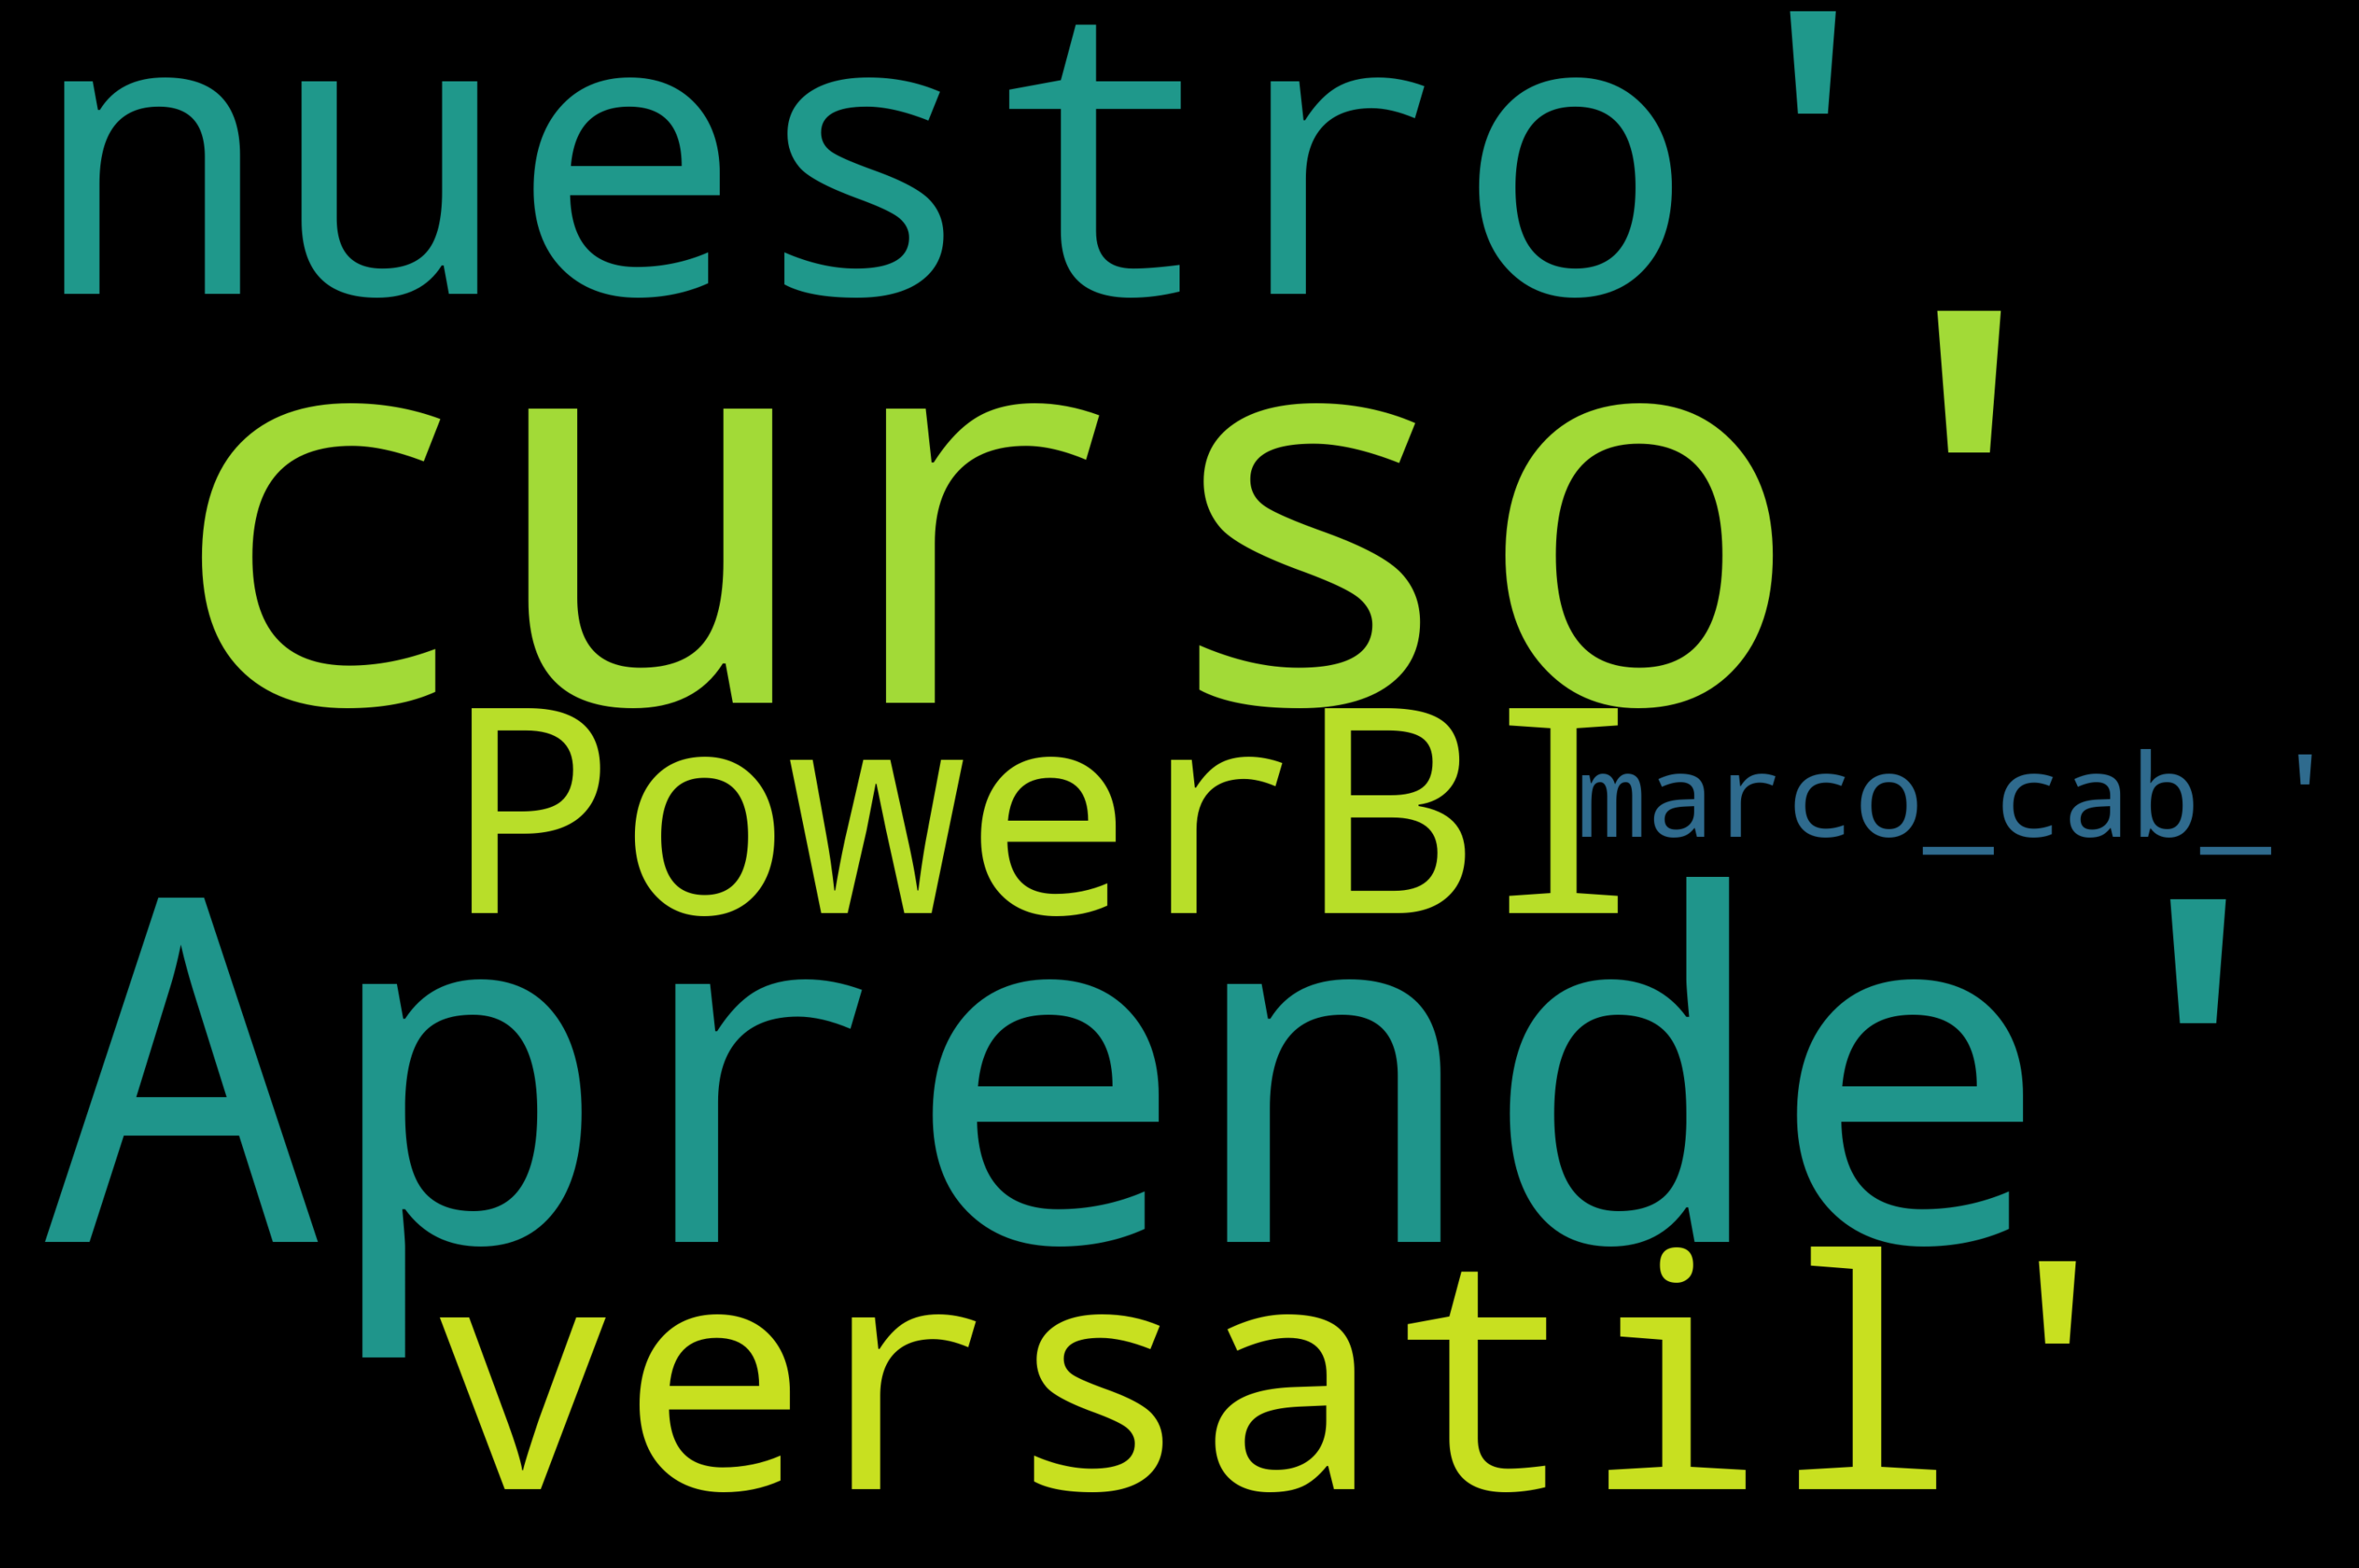

In [13]:
#Por último, creamos la nube de palabras con ayuda de la librería wordcloud.
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = top_palabras.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()